In [5]:
pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 14.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
det_model = YOLO("yolov8n.pt")

inst_model = YOLO("yolov8n-seg.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 224MB/s]


100%|██████████| 6.74M/6.74M [00:00<00:00, 294MB/s]


In [8]:
img = "/content/room.webp"

detection_results = det_model.predict(img)

instance_results = inst_model.predict(img)


image 1/1 /content/room.webp: 384x640 2 chairs, 2 couchs, 2 potted plants, 1 tv, 298.3ms
Speed: 17.1ms preprocess, 298.3ms inference, 29.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/room.webp: 384x640 1 chair, 2 couchs, 2 potted plants, 1 tv, 233.6ms
Speed: 2.9ms preprocess, 233.6ms inference, 20.7ms postprocess per image at shape (1, 3, 384, 640)


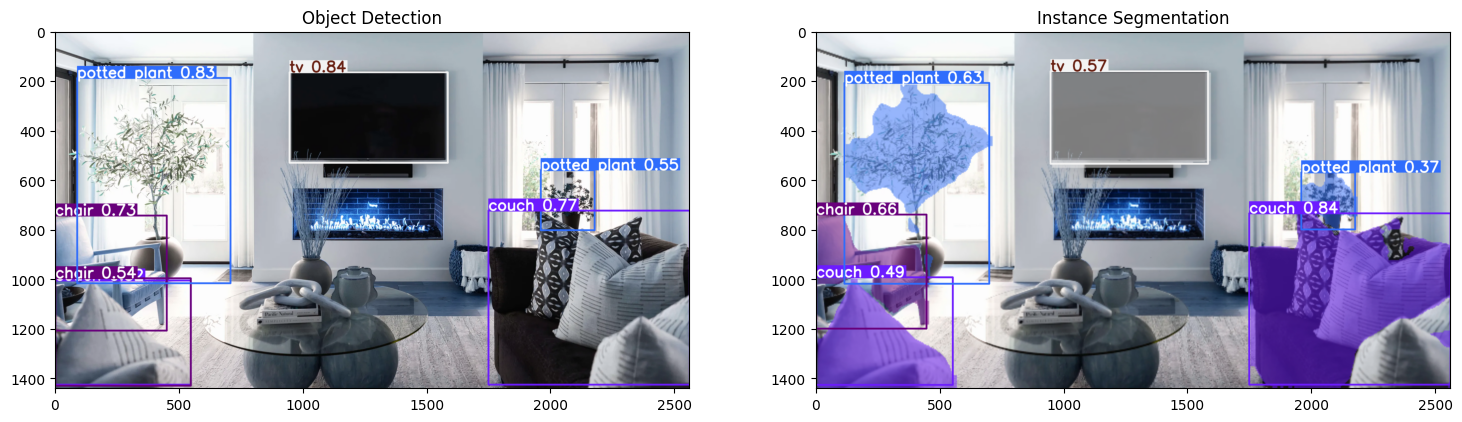

In [9]:
detection_result_array = detection_results[0].plot()
instance_result_array = instance_results[0].plot()
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Object Detection")
ax1.imshow(detection_result_array)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Instance Segmentation")
ax2.imshow(instance_result_array)

In [10]:
#Number of bounding boxes (objects) detected in the image
result = instance_results[0]
len(result.boxes)

6

In [11]:
#BBOX coordinates, class ID, and probability for a specific box.
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print(result.names)

Object type: 57.0
Coordinates: [1746.372314453125, 735.616455078125, 2558.527099609375, 1426.5703125]
Probability: 0.8360009789466858
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'be